<a href="https://colab.research.google.com/github/Srujan-rai/ML_TECHNIQUES/blob/main/ML_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [2]:
dataset_cols = {"bike_count","hour","temp","humidity","wind","visibility","dew_pt_temp","radiation","rain","snow","functional"}

In [3]:
df=pd.read_csv("/content/SeoulBikeData.csv").drop(["Date"],axis=1)

In [4]:

df["functional"]=(df["functional"]=="Yes").astype(int)
df = df[df["hour"]== 12]
df=df.drop(["hour"],axis=1)

In [5]:
df.head()

,bike_count,temp,humidity,wind,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


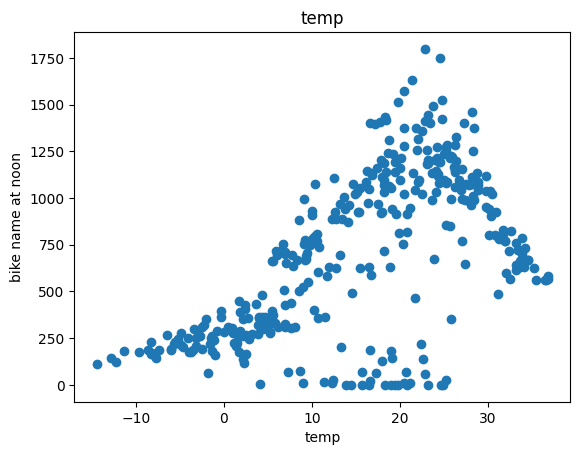

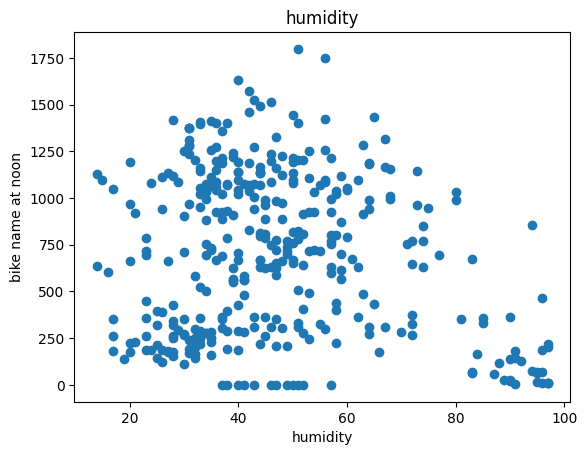

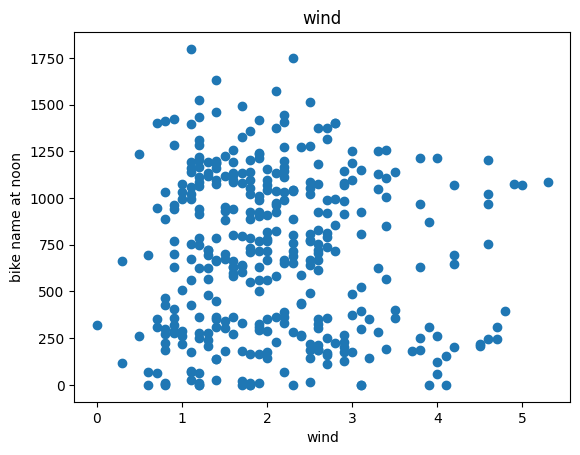

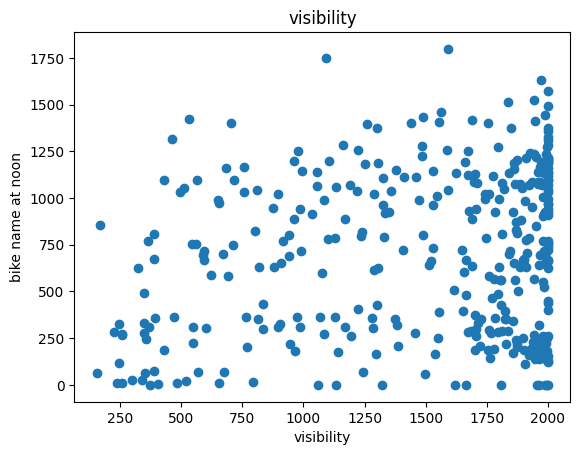

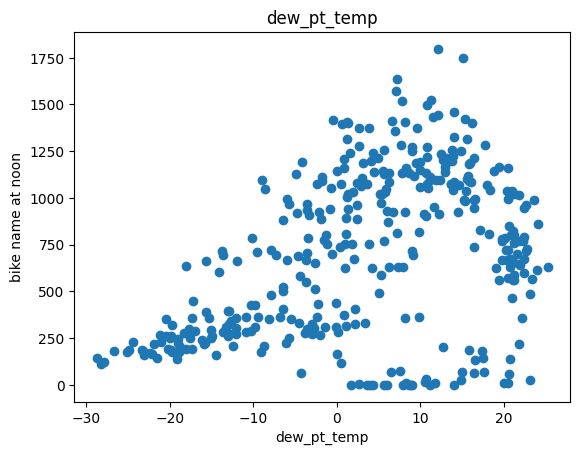

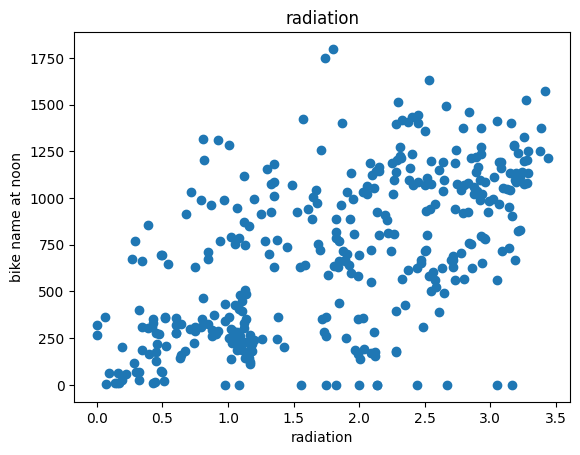

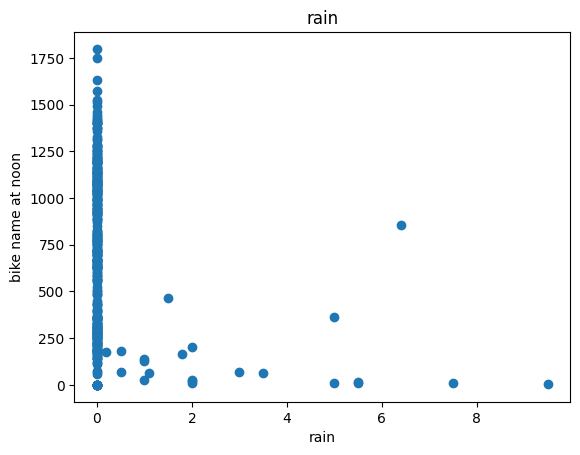

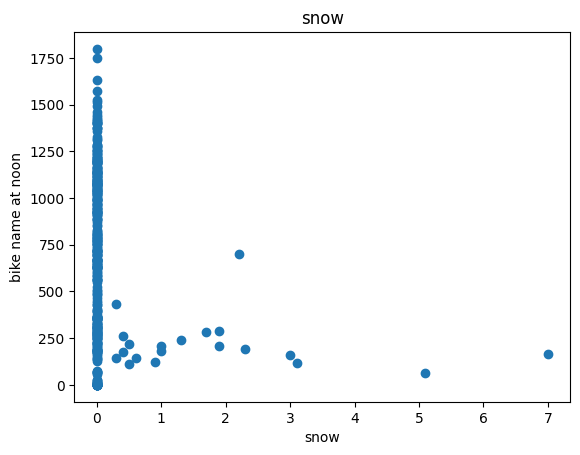

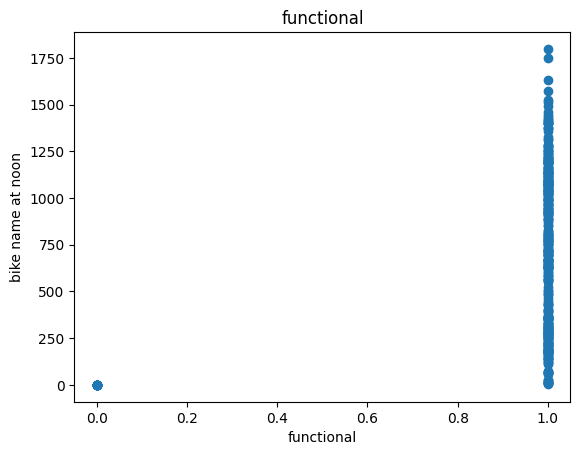

In [6]:
for label in df.columns[1:]:
  plt.scatter(df[label],df["bike_count"])
  plt.title(label)
  plt.ylabel("bike name at noon")
  plt.xlabel(label)
  plt.show()

In [7]:
df=df.drop(["wind","visibility","functional"],axis=1)

In [8]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


train,valid and test dataset split

In [9]:
train,valid,test=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [10]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

In [11]:
_, X_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, X_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])
_, X_val_temp, y_val_temp = get_xy(valid, "bike_count", x_labels=["temp"])


In [12]:
X_train_temp

array([[ 27.5],
       [ 31.7],
       [ 16.6],
       [ 20.5],
       [  7.6],
       [ 20.5],
       [  2.5],
       [  4.7],
       [ 23.2],
       [ 18.3],
       [ -0.8],
       [ 33.8],
       [  0.9],
       [ -0.3],
       [ 26.3],
       [ 33.6],
       [  4. ],
       [ 34.1],
       [ 26.1],
       [ -7.8],
       [ 11.5],
       [  3.7],
       [ 10.3],
       [ 27.4],
       [ 19.1],
       [ 16.5],
       [ 18.9],
       [ 24.5],
       [ 21.8],
       [ 23.2],
       [ 33.2],
       [  4.3],
       [ 24.4],
       [ 19. ],
       [ 28.2],
       [  0. ],
       [ 17.2],
       [ 23.8],
       [ 25.2],
       [ 30.9],
       [ 18.2],
       [ 34.1],
       [ 19.4],
       [  7.7],
       [  7.9],
       [ 28.4],
       [  1.6],
       [ 19.5],
       [ 15.1],
       [ 28.1],
       [ 20.5],
       [ -1. ],
       [ 19.6],
       [ 30.8],
       [  9. ],
       [ 10.7],
       [ 10.4],
       [ 22.9],
       [ 10. ],
       [ 24.2],
       [ -3.7],
       [  8.6],
       [

In [13]:
temp_reg=LinearRegression()
temp_reg.fit(X_train_temp,y_train_temp)

LinearRegression()

In [14]:
y_pred=temp_reg.predict(X_test_temp)

In [15]:
temp_reg.score(X_test_temp,y_test_temp)

0.3018007652877124

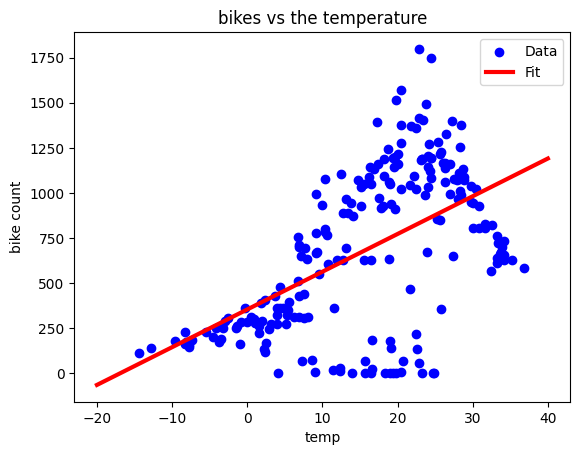

In [16]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_reg.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("bikes vs the temperature")
plt.xlabel("temp")
plt.ylabel("bike count")
plt.show()

multiple linear regression

In [17]:
_, X_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, X_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])
_, X_val_all, y_val_all = get_xy(valid, "bike_count", x_labels=df.columns[1:])

In [18]:
all_reg=LinearRegression()
all_reg.fit(X_train_all,y_train_all)

LinearRegression()

In [19]:
all_reg.score(X_test_all,y_test_all)

0.49261997155158355

**regression with neural net**

In [20]:
def plot_loss(history):
  plt.plot(history.history["loss"],label="loss")
  plt.plot(history.history["val_loss"],label="val_loss")
  plt.xlabel("Epoch")
  plt.ylabel("MSE")
  plt.legend()
  plt.grid(True)
  plt.show()

In [21]:
temp_normalizer=tf.keras.layers.Normalization(input_shape=(1,),axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [22]:
temp_nn_model=tf.keras.Sequential ([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [23]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),loss="mean_squared_error")

In [24]:
history=temp_nn_model.fit(
    X_train_temp.reshape(-1),y_train_temp,
    verbose=0,
    epochs=10000,
    validation_data=(X_val_temp,y_val_temp)
)

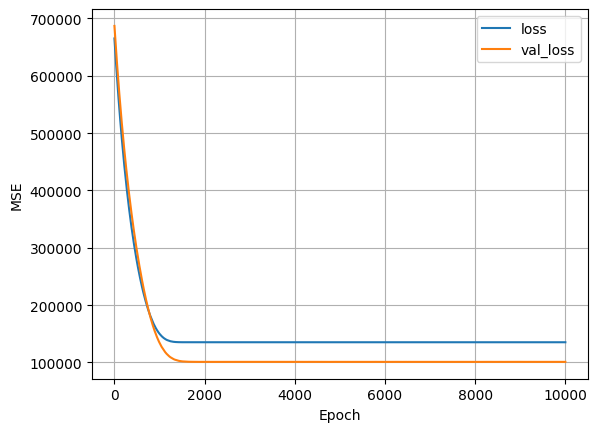

In [25]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


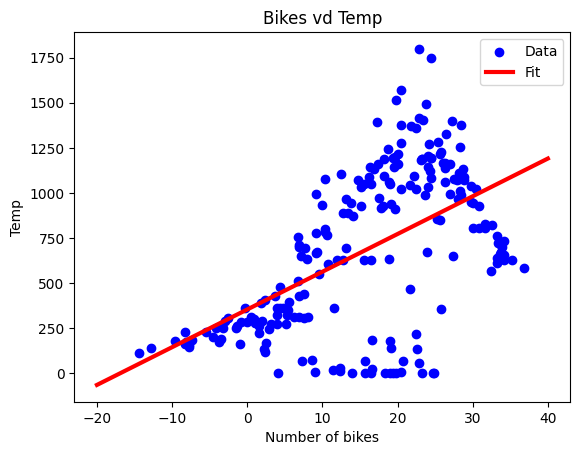

In [28]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,temp_nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vd Temp")
plt.xlabel("Number of bikes")
plt.ylabel("Temp")
plt.show()

Neural Net

In [59]:

all_normalizer = tf.keras.layers.Normalization(input_shape=(6,), axis=-1)
all_normalizer.adapt(X_train_all)
nn_model=tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32,activation="relu"),
     tf.keras.layers.Dense(32,activation="relu"),
     tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss="mean_squared_error")

In [60]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=100
)

ValueError: ignored

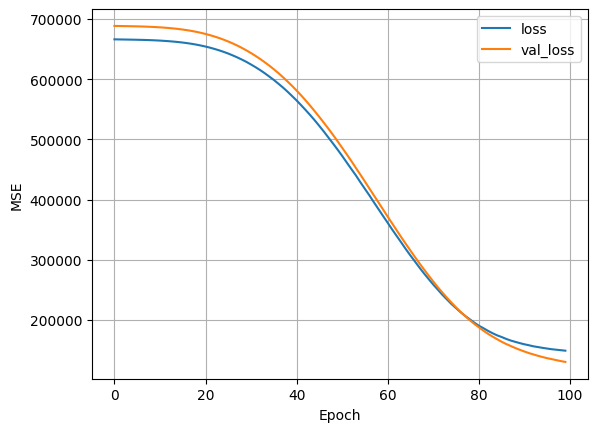

In [52]:
plot_loss(history)

4/4 [==============================] - 0s 2ms/step


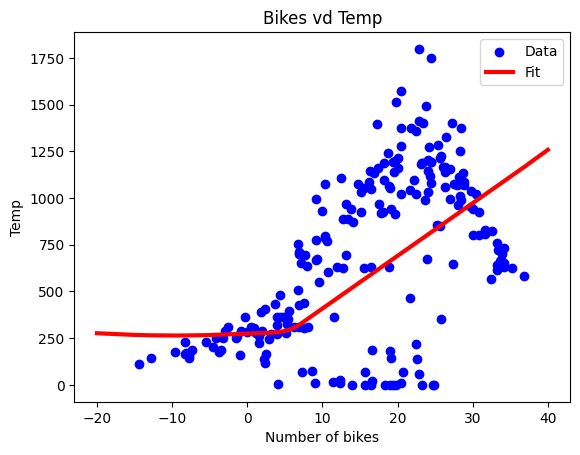

In [53]:
plt.scatter(X_train_temp,y_train_temp,label="Data",color="blue")
x=tf.linspace(-20,40,100)
plt.plot(x,nn_model.predict(np.array(x).reshape(-1,1)),label="Fit",color="red",linewidth=3)
plt.legend()
plt.title("Bikes vd Temp")
plt.xlabel("Number of bikes")
plt.ylabel("Temp")
plt.show()

In [58]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)

InvalidArgumentError: ignored

In [55]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [56]:
MSE(y_pred_lr, y_test_all)

83384.11751145663

In [57]:
MSE(y_pred_nn, y_test_all)

NameError: ignored